# Solar Assessment

### Setup

Import required packages for effective operation of notebook.

In [288]:
# Import Pandas for data frames
import pandas as pd

# Import Numpy
import numpy as np

# Import Seaborn for plotting
import seaborn as sns

# Import matplotlib for plot adjustments
import matplotlib.pyplot as plt

# Import for shorter xaxis dates
import matplotlib.dates as mdates


### Assessment Steps

To complete this assessment, several steps need to be performed:

1. Clean and review 'energy_usage' data in preparation for analysis.
2. Determine peak usage periods and general trends
3. Prepare 'solar_generation' data for assessment
4. Compare both files to determine:
    - Estimated annual energy saving using basic install
    - Benefit of battery install
    - Return of investment

#### _1. Clean & Review Usage Data_

Usage data can be obtained from [ESB Networks](https://www.esbnetworks.ie/services/manage-my-meter/about-smart-meters?https://www.esbnetworks.ie/services/manage-my-meter/about-smart-meters&gclsrc=aw.ds&gad_source=1&gad_campaignid=13801609571&gbraid=0AAAAADg-OV56fXOruwBwK5fnkCqsCekBB&gclid=EAIaIQobChMI1Pvrq-6KkQMVbZNQBh1BSCRQEAAYASAAEgIBBfD_BwE) using the existing connection MPRN number. Several different levels of information can be downloaded, but for the purpose of this review, daily meter readings were used which looks back over a period of 2 years. The file is titled `meter_readings.csv`, located in the `data` folder.

The first step is a quick check to confirm the `data` directory is there, and has the `meter_readings.csv` file within it.

In [289]:
# Check the directory and file are there
!dir "./data"

 Volume in drive C is OS
 Volume Serial Number is 74A1-F0F8

 Directory of c:\Users\danie\Course\PFDA\project\data

09/12/2025  19:32    <DIR>          .
22/12/2025  15:05    <DIR>          ..
09/12/2025  19:32            68,078 meter_readings.csv
04/12/2025  15:27         2,089,751 solar_gen.csv
               2 File(s)      2,157,829 bytes
               2 Dir(s)  362,913,787,904 bytes free


This shows that the `data` directory exists, and one of the files within that directory is `meter_readings.csv`. With that confirmed, the CSV file can be pulled in as a dataframe for analysis.

In [290]:
# File location in data folder
url = "./data/"

# Specify filename
filename = "meter_readings.csv"

# Read .csv into a data frame
df_usage = pd.read_csv(url + filename)

# Show first 5 rows
df_usage.head()

,MPRN,Meter Serial Number,Read Value,Read Type,Read Date and End Time
0,100109xxxxx,223xxxxx,10264.209,24 Hr Active Import Register (kWh),07/12/2025 00:00
1,100109xxxxx,223xxxxx,0.000,24 Hr Active Export Register (kWh),07/12/2025 00:00
2,100109xxxxx,223xxxxx,10256.147,24 Hr Active Import Register (kWh),06/12/2025 00:00
3,100109xxxxx,223xxxxx,0.000,24 Hr Active Export Register (kWh),06/12/2025 00:00
4,100109xxxxx,223xxxxx,10248.484,24 Hr Active Import Register (kWh),05/12/2025 00:00


The data can be seen to have imported cleanly however, for simplicity in coding later on, the 'Read Date and End Time' column will be renamed to simply 'Date'.

In [291]:
# Rename column
df_usage = df_usage.rename(columns={'Read Date and End Time':'Date'})

# Show first 3 rows to confirm change
df_usage.head(3)

,MPRN,Meter Serial Number,Read Value,Read Type,Date
0,100109xxxxx,223xxxxx,10264.209,24 Hr Active Import Register (kWh),07/12/2025 00:00
1,100109xxxxx,223xxxxx,0.000,24 Hr Active Export Register (kWh),07/12/2025 00:00
2,100109xxxxx,223xxxxx,10256.147,24 Hr Active Import Register (kWh),06/12/2025 00:00


The date must now be converted to a common datetime format using the `pd.to_datetime` command.

In [292]:
# Show current 'Date' column
df_usage['Date']

0      07/12/2025 00:00
1      07/12/2025 00:00
2      06/12/2025 00:00
3      06/12/2025 00:00
4      05/12/2025 00:00
             ...       
823    05/12/2023 00:00
824    04/12/2023 00:00
825    03/12/2023 00:00
826    02/12/2023 00:00
827    01/12/2023 00:00
Name: Date, Length: 828, dtype: object

It can be seen that the date in the file is captured in a DD/MM/YY HH:MM format. This must be specified in the following code, so that datetime format can be applied.

In [293]:
# Convert the date and time to a common datetime format.
pd.to_datetime(df_usage['Date'], format='%d/%m/%Y %H:%M')

0     2025-12-07
1     2025-12-07
2     2025-12-06
3     2025-12-06
4     2025-12-05
         ...    
823   2023-12-05
824   2023-12-04
825   2023-12-03
826   2023-12-02
827   2023-12-01
Name: Date, Length: 828, dtype: datetime64[ns]

This is now in datetime format but it can be seen that the hours and minutes have been dropped. Datetime does this when the hours and minutes are 00:00, and in this case is acceptable as it will not impact any later coding.

The next step is to apply the new datetime format to the dataframe.

In [294]:
# Apply datetime format to 'Date' column
df_usage["Date"]= pd.to_datetime(df_usage['Date'], format='%d/%m/%Y %H:%M')

# Show first 3 rows
df_usage.head(3)

,MPRN,Meter Serial Number,Read Value,Read Type,Date
0,100109xxxxx,223xxxxx,10264.209,24 Hr Active Import Register (kWh),2025-12-07
1,100109xxxxx,223xxxxx,0.000,24 Hr Active Export Register (kWh),2025-12-07
2,100109xxxxx,223xxxxx,10256.147,24 Hr Active Import Register (kWh),2025-12-06


The 'Date' column can now be set as the index.

In [295]:
# Set 'Date' column as index of dataframe
df_usage.set_index('Date', inplace=True)

# Show first 3 rows
df_usage.head(3)

,MPRN,Meter Serial Number,Read Value,Read Type
Date,,,,
2025-12-07,100109xxxxx,223xxxxx,10264.209,24 Hr Active Import Register (kWh)
2025-12-07,100109xxxxx,223xxxxx,0.000,24 Hr Active Export Register (kWh)
2025-12-06,100109xxxxx,223xxxxx,10256.147,24 Hr Active Import Register (kWh)


In [296]:
# Show last 3 rows
df_usage.tail(3)

,MPRN,Meter Serial Number,Read Value,Read Type
Date,,,,
2023-12-03,100109xxxxx,223xxxxx,1563.174,24 Hr Active Import Register (kWh)
2023-12-02,100109xxxxx,223xxxxx,1547.617,24 Hr Active Import Register (kWh)
2023-12-01,100109xxxxx,223xxxxx,1534.685,24 Hr Active Import Register (kWh)


It can be seen in the 'Read Type' column for certain dates that there are 2 different rows; Active Import and Active Export. For the purpose of this analysis, only the Active Import needs to be considered  ie. power consumed by the household. Rows containing 'Active Export' can be removed from the dataframe, as their values are zero anyways. 

In [297]:
# Remove export rows, and focus solely on import
df_import = df_usage[df_usage["Read Type"] == "24 Hr Active Import Register (kWh)"]

# Show firts 3 rows
df_import.head(3)

,MPRN,Meter Serial Number,Read Value,Read Type
Date,,,,
2025-12-07,100109xxxxx,223xxxxx,10264.209,24 Hr Active Import Register (kWh)
2025-12-06,100109xxxxx,223xxxxx,10256.147,24 Hr Active Import Register (kWh)
2025-12-05,100109xxxxx,223xxxxx,10248.484,24 Hr Active Import Register (kWh)


Next step is to clean the data frame by removing columns which are no longer required.

In [298]:
# Comfirm all column names
headers = df_import.columns.tolist()

# Show list
headers

['MPRN', 'Meter Serial Number', 'Read Value', 'Read Type']

From this list, MPRN, Meter Serial Number, and Read Type can be removed.

In [299]:
# Create list of columns to remove
drop_col_list = ['MPRN','Meter Serial Number','Read Type']

# Remove columns list
df_import.drop(columns=drop_col_list, inplace=True)

# Show first 3 rows.
df_import.head(3)

C:\Users\danie\AppData\Local\Temp\ipykernel_3236\733265794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_import.drop(columns=drop_col_list, inplace=True)


,Read Value
Date,
2025-12-07,10264.209
2025-12-06,10256.147
2025-12-05,10248.484


This now leaves a simple data frame, with 2 columns, the index (Date) and 'Read Value'. The index can now be reset.

In [300]:
# Reset index
df_import = df_import.reset_index()

# Show first 3 rows
df_import.head(3)

,Date,Read Value
0,2025-12-07,10264.209
1,2025-12-06,10256.147
2,2025-12-05,10248.484


As a quick check, a line plot can now be created to confirm there are no data anomilies. A simple review is to create a lineplot of the meter readings. It should have a realively smooth line, continually rising, indicating the daily meter readings rising.

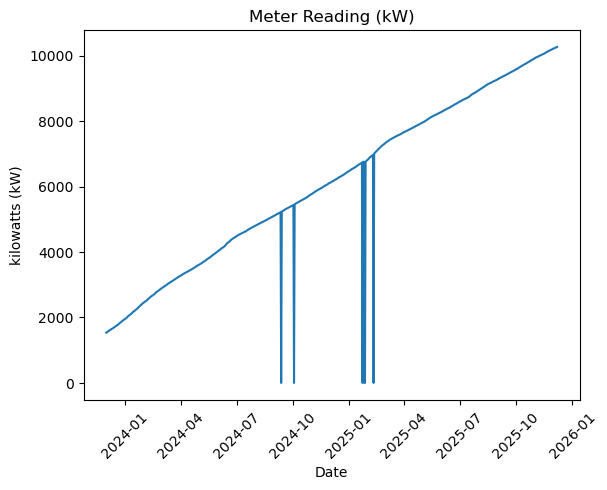

In [301]:
# Use seaborn to create lineplot, specifying 'Date' on x-axis, and 'Read Value' on y-axis
ax = sns.lineplot(data=df_import, x="Date", y="Read Value")

# Specify plot title
ax.set_title('Meter Reading (kW)')

# Rotate axis text
# Source: https://www.geeksforgeeks.org/python/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
ax.tick_params(axis='x', labelrotation=45)

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts (kW)');

It can be seen that on some dates, the meter reading was 0.0. This could be due to an error on the ESB Networks system, or a power outage at the time the reading was due to be captured. To rectify, the back fill function is used, applying the meter reading number from the day prior. This will show a resulting usage of 0.0 kW for the given days, but with the small amount of them, it won't impact the overall results.

In [302]:
# Replace all 0.0 with prior date details.
df_import = df_import.replace(0.0, method='bfill')

C:\Users\danie\AppData\Local\Temp\ipykernel_3236\3178421780.py:2: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  df_import = df_import.replace(0.0, method='bfill')


A repeat linepolt can now be created to confirm a smooth line.

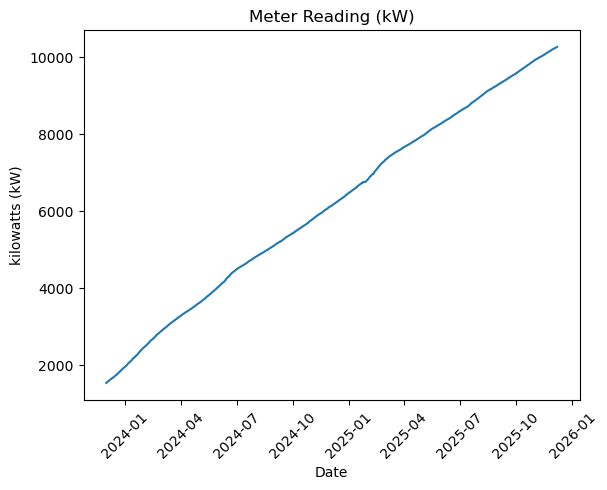

In [303]:
# Create lineplot
ax = sns.lineplot(data=df_import, x="Date", y="Read Value")

# Plot title
ax.set_title('Meter Reading (kW)')

# Rotate axis text
ax.tick_params(axis='x', labelrotation=45)

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts (kW)');

It can be seen that there are no dips in the line, therefore the data is considered clean, allowing it to be analysed. The meter readings do however need to be converted to daily consumption. This is determined by the difference between the current and previous days reading. The results can be applied to a new column titled 'Usage'.

In [304]:
# Calculate difference with previous row
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html
df_import["Usage"] = df_import["Read Value"].diff()

# Show first 5 rows
df_import.head()

,Date,Read Value,Usage
0,2025-12-07,10264.209,NaN
1,2025-12-06,10256.147,-8.062
2,2025-12-05,10248.484,-7.663
3,2025-12-04,10239.189,-9.295
4,2025-12-03,10231.011,-8.178


Given the results are negative, the ``.diff()`` command is incorrectly calculating against the following day. This needs to be changed to subtract the previous days reading, and is done by applying `-1` within the brackets.

In [305]:
# Calculate difference with following row
df_import["Usage"] = df_import["Read Value"].diff(-1)

# Show first 3 rows
df_import.head(3)

,Date,Read Value,Usage
0,2025-12-07,10264.209,8.062
1,2025-12-06,10256.147,7.663
2,2025-12-05,10248.484,9.295


In [306]:
# Show last 3 rows
df_import.tail(3)

,Date,Read Value,Usage
735,2023-12-03,1563.174,15.557
736,2023-12-02,1547.617,12.932
737,2023-12-01,1534.685,NaN


It can be seen that the earliest date (Dec 1st 2023) returns a NaN, as it has no previous meter reading to reference off.

The data is now prepared, and plots can be created of the usage, to help get a visual understanding.

#### _2. Usage & Trends_

With the `df_import` dataframe, a lineplot can be generated, to show the trend of daily usage.

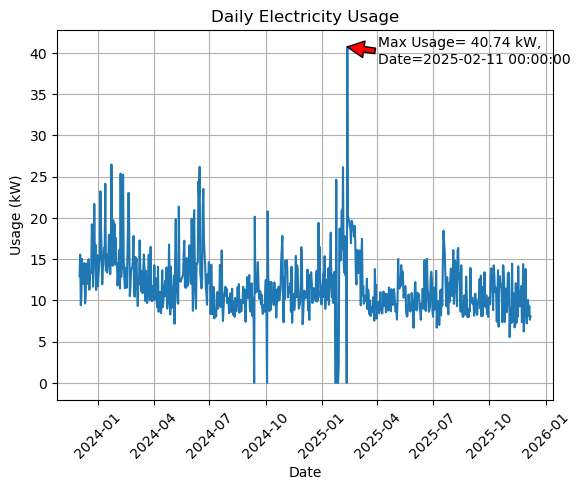

In [307]:
# Create lineplot using df_import data
ax = sns.lineplot(data=df_import, x="Date", y="Usage")

# Specify plot title
ax.set_title('Daily Electricity Usage')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('Usage (kW)')

# Rotate axis text
# Source: https://www.geeksforgeeks.org/python/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
ax.tick_params(axis='x', labelrotation=45)

# Add grid lines
ax.grid()

# Determine max amount using '.max()'
# Source: https://www.geeksforgeeks.org/python/find-maximum-values-position-in-columns-and-rows-of-a-dataframe-in-pandas/
max_dly_usage = df_import['Usage'].max()

# Confirm index position of max usage
max_dly_index_pos = df_import['Usage'].idxmax()

# Confirm date of indicated index position
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
max_dly_date = df_import.loc[max_dly_index_pos, 'Date']

# Specify text layout
max_dly_text = f"Max Usage={max_dly_usage: .2f} kW,\nDate={max_dly_date}"

# Add maximum details to plot
# Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html
ax.annotate(max_dly_text, xy=(max_dly_date, max_dly_usage), xytext=(max_dly_date+pd.Timedelta(days=+50),
            max_dly_usage-2), arrowprops=dict(facecolor='red'));

Understandably this does show a slight trend of higher consumption in the colder and darker winter days, compared to that of the brighter and warmer summer period. It can alse be seen that the maximum daily usage occured on February 11th 2025, 40.74 kW however, this is the day after a zero meter reading, so is accounting for 2 days and therefore an outlier.

To give slightly clearer and smoother lineplots, capturing the weekly and monthly usage trends might achieve this. For the weekly usage, given the dataframe starts on December 1st 2023, a Thursday, it will generate incomplete data for the week ending December 3rd. Due to this, the dates from the 1st to 3rd of December 2023 will have to be removed.

In [308]:
# Create weekly data frame.
df_import_wkly = df_import.set_index('Date')

# Show last 5 rows
df_import_wkly.tail()

,Read Value,Usage
Date,,
2023-12-05,1583.060,10.466
2023-12-04,1572.594,9.420
2023-12-03,1563.174,15.557
2023-12-02,1547.617,12.932
2023-12-01,1534.685,NaN


In [309]:
# Remove the specified dates earlier than December 4th 2023
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df_import_wkly = df_import_wkly.drop(['2023-12-03', '2023-12-02', '2023-12-01'], errors='ignore')

# Show last 5 rows
df_import_wkly.tail()

,Read Value,Usage
Date,,
2023-12-08,1622.088,11.987
2023-12-07,1610.101,12.013
2023-12-06,1598.088,15.028
2023-12-05,1583.060,10.466
2023-12-04,1572.594,9.420


The data now starts on December 4th 2023, which is a Monday (start of the week).

A similar process needs to be completed for the end of the data also.

In [310]:
# Show first 7 rows
df_import_wkly.head(7)

,Read Value,Usage
Date,,
2025-12-07,10264.209,8.062
2025-12-06,10256.147,7.663
2025-12-05,10248.484,9.295
2025-12-04,10239.189,8.178
2025-12-03,10231.011,10.061
2025-12-02,10220.950,9.311
2025-12-01,10211.639,7.225


The 7th of December 2025 is a Sunday, so the data does not need to be tidied an further. The weekly usage can therefore be determined using `.resample('W').sum()`, with the `'W'` indicating weekly, and `.sum` specifying the values are added. 

In [311]:
# Determing the weekly ('W') usage 
df_import_wkly = df_import_wkly["Usage"].resample('W').sum().reset_index(name='Usage')

# Show first 5 rows
df_import_wkly.head()

,Date,Usage
0,2023-12-10,86.926
1,2023-12-17,88.930
2,2023-12-24,99.863
3,2023-12-31,106.545
4,2024-01-07,112.157


With the dataframe now showing the usage value for each week, a lineplot can be generated.

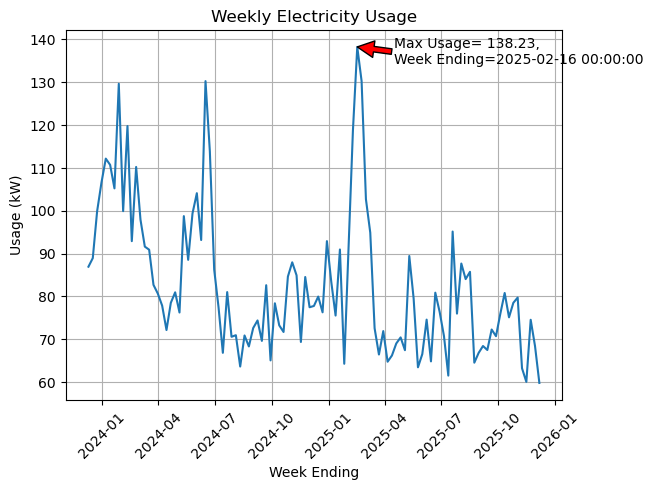

In [312]:
# Create weekly usage lineplot
ax = sns.lineplot(data=df_import_wkly, x="Date", y="Usage")

# Specify plot title
ax.set_title('Weekly Electricity Usage')

# Adjust names of axes.
ax.set_xlabel('Week Ending')
ax.set_ylabel('Usage (kW)')

# Rotate axis test
ax.tick_params(axis='x', labelrotation=45)

# Add grid lines
ax.grid()

# Determine max amount
max_usage = df_import_wkly['Usage'].max()

# Confirm index position of max usage
max_index_pos = df_import_wkly['Usage'].idxmax()

# Confirm date of indicated index position
max_date = df_import_wkly.loc[max_index_pos, 'Date']

# Specify text layout
max_text = f"Max Usage={max_usage: .2f},\nWeek Ending={max_date}"

# Add maximum details to plot
ax.annotate(max_text, xy=(max_date, max_usage), xytext=(max_date+pd.Timedelta(days=60),
            max_usage-4), arrowprops=dict(facecolor='red'));

Interestingly, this doesn't show a similar trend as the daily linelplot. Increased demand can be seen in the winter months when compared with the summer of the same year however, June in 2024 appears to be very high.

A similar plot for monthly demand can also be done.

In [313]:
# Show first 5 rows
df_import.head()

,Date,Read Value,Usage
0,2025-12-07,10264.209,8.062
1,2025-12-06,10256.147,7.663
2,2025-12-05,10248.484,9.295
3,2025-12-04,10239.189,8.178
4,2025-12-03,10231.011,10.061


In [314]:
# Create 'mtly' data frame.
df_import_mtly = df_import.set_index('Date')

# Show first 5 rows
df_import_mtly.head(8)

,Read Value,Usage
Date,,
2025-12-07,10264.209,8.062
2025-12-06,10256.147,7.663
2025-12-05,10248.484,9.295
2025-12-04,10239.189,8.178
2025-12-03,10231.011,10.061
2025-12-02,10220.950,9.311
2025-12-01,10211.639,7.225
2025-11-30,10204.414,8.758


To ensure only full months are captured in the data, the 7 dates in December need to be removed.

In [315]:
# Remove dates in December 2025
df_import_mtly = df_import_mtly.drop(['2025-12-07', '2025-12-06', '2025-12-05', '2025-12-04', '2025-12-03', '2025-12-02', '2025-12-01'], errors='ignore')

# Show first 5 rows
df_import_mtly.head()

,Read Value,Usage
Date,,
2025-11-30,10204.414,8.758
2025-11-29,10195.656,13.815
2025-11-28,10181.841,8.098
2025-11-27,10173.743,8.122
2025-11-26,10165.621,6.235


In [316]:
# Show last 5 rows
df_import_mtly.tail()

,Read Value,Usage
Date,,
2023-12-05,1583.060,10.466
2023-12-04,1572.594,9.420
2023-12-03,1563.174,15.557
2023-12-02,1547.617,12.932
2023-12-01,1534.685,NaN


The data starts on the 1st of December 2023, so no change is necessary here, and the 'NaN' won't impact the results in any significant manner.

In [317]:
# Determing the monthly ('ME') usage
df_import_mtly = df_import_mtly["Usage"].resample('ME').sum().reset_index(name='Usage')

# Show first 5 rows
df_import_mtly.head()

,Date,Usage
0,2023-12-31,410.753
1,2024-01-31,504.379
2,2024-02-29,433.831
3,2024-03-31,386.015
4,2024-04-30,332.569


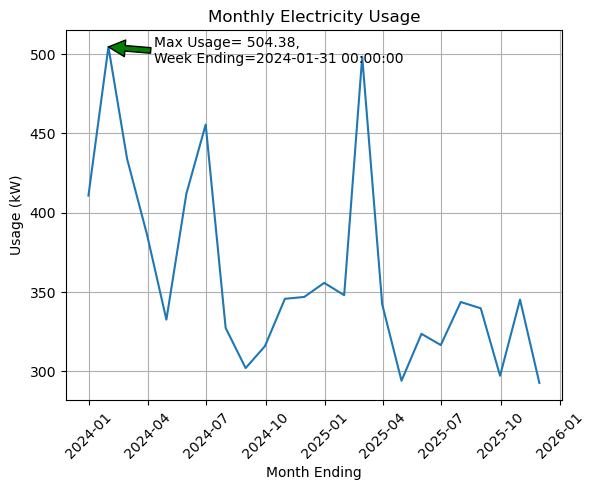

In [318]:
# Create monthly usage lineplot
ax = sns.lineplot(data=df_import_mtly, x="Date", y="Usage")

# Specify plot title
ax.set_title('Monthly Electricity Usage')

# Adjust names of axes.
ax.set_xlabel('Month Ending')
ax.set_ylabel('Usage (kW)')

# Rotate axis test
ax.tick_params(axis='x', labelrotation=45)

# Add gridlines
ax.grid()

# Determine max amount
max_mtly_usage = df_import_mtly['Usage'].max()

# Confirm index position of max usage
max_mtly_index_pos = df_import_mtly['Usage'].idxmax()

# Confirm date of indicated index position
max_mtly_date = df_import_mtly.loc[max_mtly_index_pos, 'Date']

# Specify text layout
max_mtly_text = f"Max Usage={max_mtly_usage: .2f},\nWeek Ending={max_mtly_date}"

# Add maximum details to plot
ax.annotate(max_mtly_text, xy=(max_mtly_date, max_mtly_usage), xytext=(max_mtly_date+pd.Timedelta(days=70),
            max_mtly_usage-10), arrowprops=dict(facecolor='green'));

##### <u>_Results overview_</u>

From the above plots, it can be seen that there is increased demand in the darker and colder winter months as would be expected however, some of the spring/summer weeks and months also show high energy usage. The reasons for these don't need to be determined, but will feed into the overall assessment.

Also, as expected, the demand across each year isn't uniform, and does change. Many factors influence this, weather, events, different appliances used, etc. nonetheless, the calculated usage dataframe can be used for calculating the solar impact.

#### _3. Solar Generation Potential_

To determine the estimated solar generation potential, data can be found [here](https://re.jrc.ec.europa.eu/pvg_tools/en/#PVP). This is a European Commission site that provides a .csv file for potential solar generation based of certain criteria:
- Site location
- Peak solar install generation potential
- Mounting orientation (azimuth)
- Installation slope

This file can be found in the [DATA](https://github.com/danielfinnerty/PFDA/tree/main/project/data) directory, titled `solar_gen.csv`.

In [319]:
# Solar-gen location in data folder
url = "./data/"

# File name
solar_filename="solar_gen.csv"

# Read CVS into a data frame, skipping first 23 rows as these are just acronym definitions
df_gen = pd.read_csv(url + solar_filename, skiprows=10)

# Show first 5 rows
df_gen.head()

,time,P,G(i),H_sun,T2m,WS10m,Int
0,20200101:0011,0,0.0,0.0,6.22,2.14,0.0
1,20200101:0111,0,0.0,0.0,6.20,2.21,0.0
2,20200101:0211,0,0.0,0.0,5.87,2.34,0.0
3,20200101:0311,0,0.0,0.0,5.62,2.48,0.0
4,20200101:0411,0,0.0,0.0,5.43,2.55,0.0


This file has several columns of data; 'P', 'G(i)', 'H_sun', etc. however, to determine the column of interest, we need to review the legend, which is at the end.

In [320]:
# Show last 10 rows.
df_gen.tail(14)

,time,P,G(i),H_sun,T2m,WS10m,Int
52605,20251231:2111,0,0.0,0.0,6.46,6.14,0.0
52606,20251231:2211,0,0.0,0.0,6.47,5.86,0.0
52607,20251231:2311,0,0.0,0.0,6.51,5.66,0.0
52608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52609,P: PV system power (W),NaN,NaN,NaN,NaN,NaN,NaN
52610,G(i): Global irradiance on the inclined plane ...,NaN,NaN,NaN,NaN,NaN,NaN
52611,H_sun: Sun height (degree),NaN,NaN,NaN,NaN,NaN,NaN
52612,T2m: 2-m air temperature (degree Celsius),NaN,NaN,NaN,NaN,NaN,NaN
52613,WS10m: 10-m total wind speed (m/s),NaN,NaN,NaN,NaN,NaN,NaN
52614,Int: 1 means solar radiation values are recons...,NaN,NaN,NaN,NaN,NaN,NaN


It can be seen above that column 'P' refers to the solar generation, and is therefore the column of interest.

Now that this detail is know, these latter rows can be dropped; row 52608 to (and including) 52618.

In [321]:
# Drop rows 52608 to 52618
# Source: https://stackoverflow.com/questions/61673097/dropping-multiple-ranges-of-rows-in-a-pandas-dataframe
df_gen.drop(df_gen.iloc[52608:52619].index, inplace=True)

# Show last 5 rows
df_gen.tail()

,time,P,G(i),H_sun,T2m,WS10m,Int
52603,20251231:1911,0,0.0,0.0,6.72,6.07,0.0
52604,20251231:2011,0,0.0,0.0,6.60,6.21,0.0
52605,20251231:2111,0,0.0,0.0,6.46,6.14,0.0
52606,20251231:2211,0,0.0,0.0,6.47,5.86,0.0
52607,20251231:2311,0,0.0,0.0,6.51,5.66,0.0


With that done, as with the meter readings data, the time must be converted to datetime format, to allow later analysis.

In [322]:
# Show 'time' column
df_gen["time"]

0        20200101:0011
1        20200101:0111
2        20200101:0211
3        20200101:0311
4        20200101:0411
             ...      
52603    20251231:1911
52604    20251231:2011
52605    20251231:2111
52606    20251231:2211
52607    20251231:2311
Name: time, Length: 52608, dtype: object

In [323]:
# Convert the date and time to a common datetime format.
pd.to_datetime(df_gen['time'], format="%Y%m%d:%H%M")

0       2020-01-01 00:11:00
1       2020-01-01 01:11:00
2       2020-01-01 02:11:00
3       2020-01-01 03:11:00
4       2020-01-01 04:11:00
                ...        
52603   2025-12-31 19:11:00
52604   2025-12-31 20:11:00
52605   2025-12-31 21:11:00
52606   2025-12-31 22:11:00
52607   2025-12-31 23:11:00
Name: time, Length: 52608, dtype: datetime64[ns]

In [324]:
# Apply the new datetime format to the data frame in the 'time' column
df_gen["time"]= pd.to_datetime(df_gen['time'], format='%Y%m%d:%H%M')

# show first 3 rows
df_gen.head(3)

,time,P,G(i),H_sun,T2m,WS10m,Int
0,2020-01-01 00:11:00,0,0.0,0.0,6.22,2.14,0.0
1,2020-01-01 01:11:00,0,0.0,0.0,6.20,2.21,0.0
2,2020-01-01 02:11:00,0,0.0,0.0,5.87,2.34,0.0


This now allows the time column to be applied as the data frame index.

In [325]:
# Apply time column as index
df_gen.set_index('time', inplace=True)

# Show first 3 rows
df_gen.head(3)

,P,G(i),H_sun,T2m,WS10m,Int
time,,,,,,
2020-01-01 00:11:00,0,0.0,0.0,6.22,2.14,0.0
2020-01-01 01:11:00,0,0.0,0.0,6.20,2.21,0.0
2020-01-01 02:11:00,0,0.0,0.0,5.87,2.34,0.0


The dataframe can now be easily reviewed by picking a specific date to review, provided it is entered in the same format as the datetime; YYYY-MM-DD.

In [326]:
# Show generation data for December 25th 2023
df_gen.loc["2023-12-25"]


,P,G(i),H_sun,T2m,WS10m,Int
time,,,,,,
2023-12-25 00:11:00,0,0.00,0.00,7.48,4.14,0.0
2023-12-25 01:11:00,0,0.00,0.00,7.52,4.28,0.0
2023-12-25 02:11:00,0,0.00,0.00,7.58,4.69,0.0
2023-12-25 03:11:00,0,0.00,0.00,7.73,5.10,0.0
2023-12-25 04:11:00,0,0.00,0.00,8.00,5.31,0.0
2023-12-25 05:11:00,0,0.00,0.00,8.30,5.38,0.0
2023-12-25 06:11:00,0,0.00,0.00,8.49,5.31,0.0
2023-12-25 07:11:00,0,0.00,0.00,8.41,4.83,0.0
2023-12-25 08:11:00,0,0.00,0.00,8.45,4.76,0.0


The data is provided over 1 hour increments. To determine daily generation, the hourly data from each day `('D')` needs to be summed together using the `.reasmple('D').sum()` command.

In [327]:
# Determing the daily ('D') sum value. 
daily_gen = df_gen["P"].resample('D').sum().reset_index(name='P')

# Show first 3 rows
daily_gen.head(3)

,time,P
0,2020-01-01,000000000043.24236.57779.722082.411042.27694.2...
1,2020-01-02,0000000000354.022984.18678.35569.29399.72376.2...
2,2020-01-03,00000000001812.332931.272368.791175.012640.053...


Given the above output, this indicates that Pandas sees the 'P' column as a string, which needs to be converted to integers so that the `resample('D').sum()` command works.

In [328]:
# Confirm 'P' column type
daily_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2192 non-null   datetime64[ns]
 1   P       2192 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 34.4+ KB


In [329]:
# Convert 'P' column to integers
# ource: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
df_gen['P'] = pd.to_numeric(df_gen['P'], errors='coerce')

# Determing the daily ('D') sum
# Divide by 1000 to convert from watts to kilowatts (kW)
daily_gen = df_gen["P"].resample('D').sum().div(1000).reset_index(name='P')

# Show first 5 rows
daily_gen.head()

,time,P
0,2020-01-01,4.87848
1,2020-01-02,5.36184
2,2020-01-03,10.96103
3,2020-01-04,3.64304
4,2020-01-05,0.85194


This is much better, and now captures the sum generation value for each calendar day.

The `daily_gen` dataframe is now ready for analysis. Firstly a plot can be generated to give an indication of the generation opportunity trend per day.

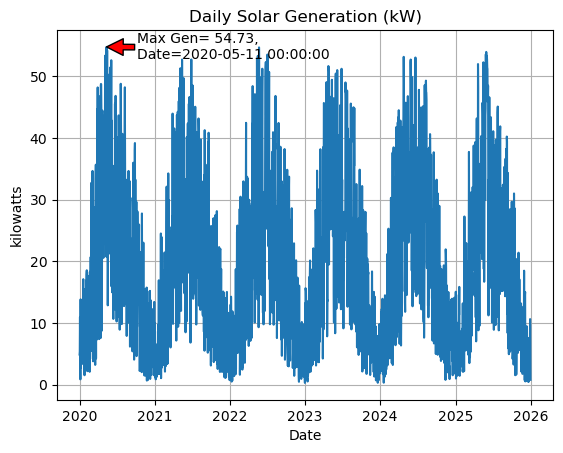

In [330]:
# Use seaborn to create lineplot, specifying date on x-axis, and meant on y-axis
ax = sns.lineplot(data=daily_gen, x="time", y="P")

# Specify plot title
ax.set_title('Daily Solar Generation (kW)')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts')

# Add gridlines
ax.grid()

# Determine max amount
max_dly_gen = daily_gen['P'].max()

# Confirm index position of max usage
max_gen_index_pos = daily_gen['P'].idxmax()

# Confirm date of indicated index position
max_gen_date = daily_gen.loc[max_gen_index_pos, 'time']

# Specify text layout
max_dly_gen_text = f"Max Gen={max_dly_gen: .2f},\nDate={max_gen_date}"

# Add maximum details to plot
ax.annotate(max_dly_gen_text, xy=(max_gen_date, max_dly_gen), xytext=(max_gen_date+pd.Timedelta(days=150),
            max_dly_gen-2), arrowprops=dict(facecolor='red'));

As would be expected, most generation occurs in the summer months with brighter and longer daylight periods, in addition to a higher sun giving a better angle on the panels. This is evident by peak generation occurring on May 11th.

Similar plots can again be done by week or month, but for a quick review, monthly generation will be plotted. As like before, the dataframe must capture full months only.

In [331]:
# Show first 5 rows
df_gen.head()

,P,G(i),H_sun,T2m,WS10m,Int
time,,,,,,
2020-01-01 00:11:00,0.0,0.0,0.0,6.22,2.14,0.0
2020-01-01 01:11:00,0.0,0.0,0.0,6.20,2.21,0.0
2020-01-01 02:11:00,0.0,0.0,0.0,5.87,2.34,0.0
2020-01-01 03:11:00,0.0,0.0,0.0,5.62,2.48,0.0
2020-01-01 04:11:00,0.0,0.0,0.0,5.43,2.55,0.0


This can be seen to start on January 1st, so therefore will be a full month.

In [332]:
# Show last 5 rows
df_gen.tail()

,P,G(i),H_sun,T2m,WS10m,Int
time,,,,,,
2025-12-31 19:11:00,0.0,0.0,0.0,6.72,6.07,0.0
2025-12-31 20:11:00,0.0,0.0,0.0,6.60,6.21,0.0
2025-12-31 21:11:00,0.0,0.0,0.0,6.46,6.14,0.0
2025-12-31 22:11:00,0.0,0.0,0.0,6.47,5.86,0.0
2025-12-31 23:11:00,0.0,0.0,0.0,6.51,5.66,0.0


Similarly, the data ends on December 31st 2025, which is a full month also. No dates therefore need to be removed.

In [333]:
# Determing the monthly ('ME') sum
# Divide by 1000 to convert to kilowatts (kW)
mtly_gen = df_gen["P"].resample('ME').sum().div(1000).reset_index(name='P')

# Show first 5 rows
mtly_gen.head()

,time,P
0,2020-01-31,222.58023
1,2020-02-29,371.80750
2,2020-03-31,622.63772
3,2020-04-30,930.99062
4,2020-05-31,1127.46040


The monthly data can now be plotted.

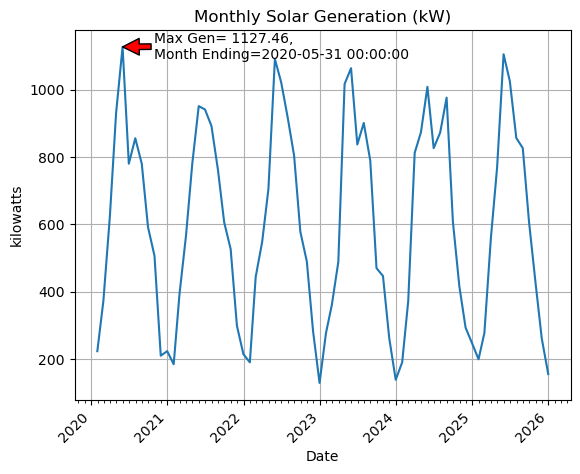

In [334]:
# Use seaborn to create lineplot, specifying date on x-axis, and meant on y-axis
ax = sns.lineplot(data=mtly_gen, x="time", y="P")

# Specify plot title
ax.set_title('Monthly Solar Generation (kW)')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts')

# Add gridlines
ax.grid()

# Rotate x-axis lables 45°
plt.xticks(rotation=45, horizontalalignment='right')

# Add minor ticks
# Source: https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html#sphx-glr-gallery-text-labels-and-annotations-date-py
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Determine max amount
max_mtly_gen = mtly_gen['P'].max()

# Confirm index position of max usage
max_mtly_index_pos = mtly_gen['P'].idxmax()

# Confirm date of indicated index position
max_mtly_date = mtly_gen.loc[max_mtly_index_pos, 'time']

# Specify text layout
max_mtly_gen_text = f"Max Gen={max_mtly_gen: .2f},\nMonth Ending={max_mtly_date}"

# Add maximum details to plot
ax.annotate(max_mtly_gen_text, xy=(max_mtly_date, max_mtly_gen), xytext=(max_mtly_date+pd.Timedelta(days=150),
            max_mtly_gen-35), arrowprops=dict(facecolor='red'));

Interestingly, the month with the highest generation, May 2020, is also the same month that had the highest daily figure. One isn't automatically indicative of the other however, this would suggest that May in 2020 had a high quantity of sunshine.

The above can again be repeated, but for the yearly generation.

In [335]:
# Determing the yearly ('YE') mean
# Divide by 1000 to convert to kilowatts (kW)
yrly_gen = df_gen["P"].resample('YE').sum().div(1000).reset_index(name='P')

# Show all rows
yrly_gen

,time,P
0,2020-12-31,7221.27180
1,2021-12-31,7115.84844
2,2022-12-31,7201.07337
3,2023-12-31,7050.73423
4,2024-12-31,7495.04400
5,2025-12-31,7065.46954


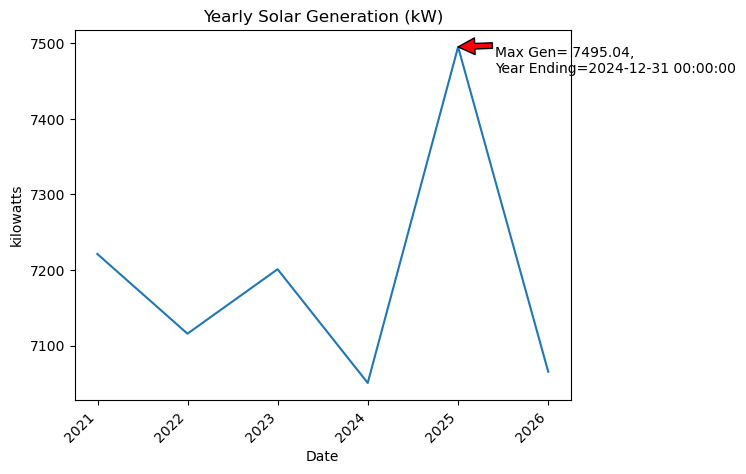

In [336]:
# Use seaborn to create lineplot, specifying date on x-axis, and meant on y-axis
ax = sns.lineplot(data=yrly_gen, x="time", y="P")

# Specify plot title
ax.set_title('Yearly Solar Generation (kW)')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts')

# Rotate x-axis lables 45°
plt.xticks(rotation=45, horizontalalignment='right')

# Determine max amount
max_yrly_gen = yrly_gen['P'].max()

# Confirm index position of max usage
max_yrly_index_pos = yrly_gen['P'].idxmax()

# Confirm date of indicated index position
max_yrly_date = yrly_gen.loc[max_yrly_index_pos, 'time']

# Specify text layout
max_yrly_gen_text = f"Max Gen={max_yrly_gen: .2f},\nYear Ending={max_yrly_date}"

# Add maximum details to plot
ax.annotate(max_yrly_gen_text, xy=(max_yrly_date, max_yrly_gen), xytext=(max_yrly_date+pd.Timedelta(days=150),
            max_yrly_gen-34), arrowprops=dict(facecolor='red'));

While the above Yearly Generation table shows 2024 as having a significantly higher solar generation opportunity than all other years, it is important to recognise that the difference between the best year (2024), and the worst (2023) is only 445 kilowatts, or a little under 6% of 2024's total figure.

Notably from the above, it can be seen that the expected annual generation is in the region of 7,100 to 7,200 kilowatts.

#### _4. Data Compare_

To compare the usage and generation data, `pd.merge` can be used to merge both dataframes together. A common column is required for this, the best one to use being the datetime however, in both dataframes it needs to be named the same.

In [337]:
# Show first 3 rows of daily generation dataframe.
daily_gen.head(3)

,time,P
0,2020-01-01,4.87848
1,2020-01-02,5.36184
2,2020-01-03,10.96103


In [338]:
# Show first 3 rows of daily import dataframe.
df_import_wkly.head(3)

,Date,Usage
0,2023-12-10,86.926
1,2023-12-17,88.930
2,2023-12-24,99.863


It can be seen that the datetime column is titled 'time' in the generation dataframe, and 'Date' in the import dataframe. To correct this, 'time' will be renamed to 'Date'

In [339]:
# Rename 'time' column to 'Date'
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
daily_gen_renamed = daily_gen.rename(columns={'time':'Date'})

# Show first 3 rows
daily_gen_renamed.head(3)


,Date,P
0,2020-01-01,4.87848
1,2020-01-02,5.36184
2,2020-01-03,10.96103


It is now possible to merge both sets of data, aligning them on the dates as captured in the 'Date' column.

In [340]:
# Merge both sets of data, using 'Date' column as reference
# Source: https://medium.com/analytics-vidhya/how-to-pd-merge-two-data-frames-on-a-common-date-column-e7808d7ccaee
merged_df = pd.merge(df_import, daily_gen_renamed, on='Date')

# show first 5 rows
merged_df.head()

,Date,Read Value,Usage,P
0,2025-12-07,10264.209,8.062,6.57446
1,2025-12-06,10256.147,7.663,0.52336
2,2025-12-05,10248.484,9.295,15.02020
3,2025-12-04,10239.189,8.178,14.47768
4,2025-12-03,10231.011,10.061,0.70282


In [341]:
# Show last 5 rows
merged_df.tail()

,Date,Read Value,Usage,P
733,2023-12-05,1583.060,10.466,14.25900
734,2023-12-04,1572.594,9.420,10.59878
735,2023-12-03,1563.174,15.557,1.31354
736,2023-12-02,1547.617,12.932,3.37614
737,2023-12-01,1534.685,NaN,15.03572


Given the Date column was used as reference for aligning the data, only rows where there is matching values in both dataframes would be used. From the above 2 cells, this can be seen to be from the 1st of December 2023 up to the 7th of December 2025.

These 2 columns of data can now be plotted together.

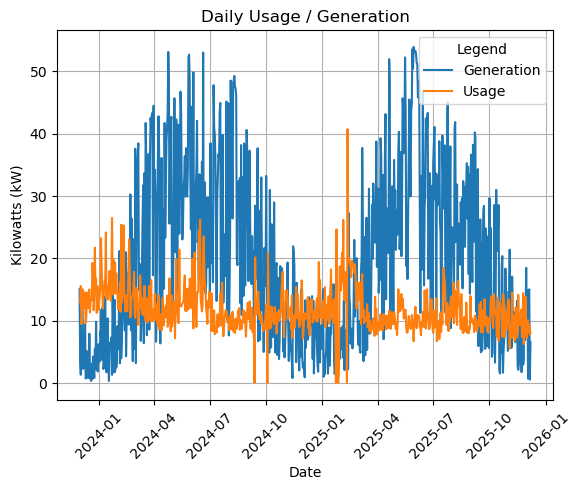

In [342]:
# Use seaborn to create lineplot, specifying date on x-axis, and the generation 'P' on y-axis
ax = sns.lineplot(data=merged_df, x="Date", y="P", label='Generation')

# On the same plot, add 'Usage' data.
sns.lineplot(data=merged_df, x="Date", y="Usage", label='Usage')

# Specify plot title
ax.set_title('Daily Usage / Generation')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('Kilowatts (kW)')

# Add gridlines
ax.grid()

# Rotate axis test
ax.tick_params(axis='x', labelrotation=45)

# Add legend
ax.legend(loc='upper right', title="Legend");

The above shows that the level of generation by far exceeds usage from generally March to September however, to get a better understanding of this, an additional column can be added to the data frame. This new column 'Net Result' will subtract the usage from the generation for each day. A positive integer indicates generation exceeds consumption (surplus), whereas a negative integer means the opposite (shortage).

In [343]:
# Create new column with result from subtracting 'Usage' from 'P'
# Source: https://stackoverflow.com/questions/74054888/subtracting-two-columns-to-form-a-new-column-pandas
merged_df['Result'] = merged_df['P'] - merged_df['Usage']

# Show first 5 rows
merged_df.head()

,Date,Read Value,Usage,P,Result
0,2025-12-07,10264.209,8.062,6.57446,-1.48754
1,2025-12-06,10256.147,7.663,0.52336,-7.13964
2,2025-12-05,10248.484,9.295,15.02020,5.72520
3,2025-12-04,10239.189,8.178,14.47768,6.29968
4,2025-12-03,10231.011,10.061,0.70282,-9.35818


This new result column can now be plotted.

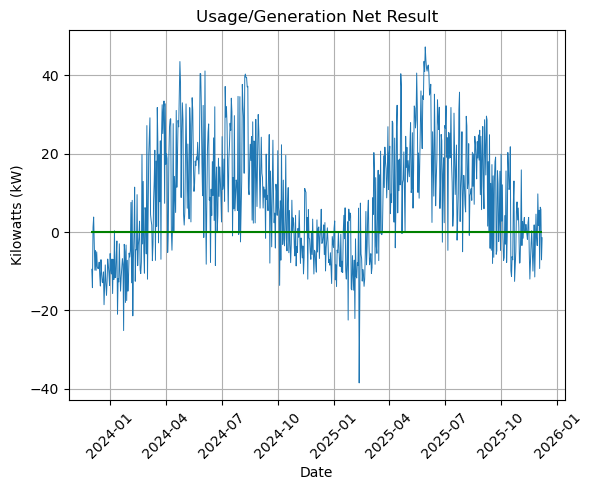

In [344]:
# Create lineplot of 'Result' column
ax = sns.lineplot(data=merged_df, x="Date", y="Result", linewidth = '0.7')

# Specify plot title
ax.set_title('Usage/Generation Net Result')

# Add gridlines
ax.grid()

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('Kilowatts (kW)')

# Rotate axis test
ax.tick_params(axis='x', labelrotation=45)

# Add horizontal line along x-axis using max and min dates for 'xmax' and 'xmin'
# Source: https://www.geeksforgeeks.org/python/matplotlib-axes-axes-hlines-in-python/
ax.hlines(y=[0], colors=['g'], linestyles=['-'], xmin=merged_df['Date'].min(), xmax=merged_df['Date'].max(),);

This clearly shows the amount of excess electricity and the shortage over the 2 year period. The amount of excess generation significantly outweighs that of the higher demand, the exact figures for each which can be calculated.

In [345]:
# Sum all positive values to determine excess generation
# Add values where 'Result' is greater than zero
excess_gen_tot = merged_df['Result'][merged_df['Result'] > 0].sum()

# Sum all negative values to determine volume of demand outweighing generation
# Add values where 'Result' is less than zero
addit_demand_tot = merged_df['Result'][merged_df['Result'] < 0].sum()

# Print results
print(f"Excess power generated={excess_gen_tot: .2f} kW,\nDemand exceeding generation={-addit_demand_tot: .2f} kW")

Excess power generated= 7772.55 kW,
Demand exceeding generation= 1912.60 kW


This shows that over a 2 year period, given the size of the solar install, in excess of 7,700 kilowatts of electricity would be returned to the grid. This is a significant factor when considering that the  feed-in tariff is €0.185 ([source](https://switcher.ie/gas-electricity/feed-in-tariffs/)).

In [346]:
# Calculate return on feed-in tarriff
fit_rate = 0.185
fit_return_tot = excess_gen_tot * fit_rate

# Print results
print(f"Feed-in tariff return= €{fit_return_tot: .2f}")

Feed-in tariff return= € 1437.92


Over the 2 year period, €1,437.92 would be made through the feed-in tarrif. This can be calculated over a 12 month window, aligned with the dates of the `merged_df` dataframe:
- 1st December 2023 > 30th November 2024
- 1st December 2024 > 30th November 2025

In [347]:
# Calculate excess generation for 2023 to 2024
excess_gen24 = merged_df['Result'][merged_df['Result'] > 0][merged_df['Date'] >= '2023-12-01'][merged_df['Date'] < '2024-12-01'].sum()

# Associated feed-in tarrif
fit_return24 = excess_gen24 * fit_rate

# Calculate demand for same period
demand_24 = merged_df['Result'][merged_df['Result'] < 0][merged_df['Date'] >= '2023-12-01'][merged_df['Date'] < '2024-12-01'].sum()

# Import rate - current electricity contract price
import_rate = 0.278

# Associated feed-in tarrif
# 'demand_24' is negative, so a minus is place before it to make positive
demand_cost24 = -demand_24 * import_rate

# Calculate net result
net_result_24 = fit_return24 - demand_cost24

# Calculate excess generation for 2024 to 2025
excess_gen25 = merged_df['Result'][merged_df['Result'] > 0][merged_df['Date'] >= '2024-12-01'][merged_df['Date'] < '2025-12-01'].sum()

# Associated feed-in tarrif
fit_return25 = excess_gen25*fit_rate

# Calculate demand for same period
demand_25 = merged_df['Result'][merged_df['Result'] < 0][merged_df['Date'] >= '2024-12-01'][merged_df['Date'] < '2025-12-01'].sum()

# Associated feed-in tarrif
demand_cost25 = -demand_25 * import_rate

# Calculate net result
net_result_25 = fit_return25 - demand_cost25

# Print results
print(f"The feed-in tariff return from Dec 1st 2023 to Nov 30th 2024 is €{fit_return24: .2f}")
print(f"and the import cost for the same period is €{demand_cost24: .2f}.")
print(f"The net result is credit of €{net_result_24: .2f}\n")
print(f"The feed-in tariff return from Dec 1st 2024 to Nov 30th 2025 is €{fit_return25: .2f}")
print(f"and the import cost for the same period is €{demand_cost25: .2f}")
print(f"The net result is credit of €{net_result_25: .2f}\n")

The feed-in tariff return from Dec 1st 2023 to Nov 30th 2024 is € 708.50
and the import cost for the same period is € 286.67.
The net result is credit of € 421.83

The feed-in tariff return from Dec 1st 2024 to Nov 30th 2025 is € 725.86
and the import cost for the same period is € 240.03
The net result is credit of € 485.83



This can be compared against overall consumption without a solar install.

In [348]:
# Calculate usage for same period from 2023 to 2024
usage_24 = df_import['Usage'][df_import['Date'] >= '2023-12-01'][df_import['Date'] < '2024-12-01'].sum()

# Associated feed-in tarrif
usage_24_cost = usage_24 * import_rate

# Calculate usage for same period from 2023 to 2024
usage_25 = df_import['Usage'][df_import['Date'] >= '2024-12-01'][df_import['Date'] < '2025-12-01'].sum()

# Associated feed-in tarrif
usage_25_cost = usage_25 * import_rate

# Total usage cost
total_usage_cost = usage_24_cost + usage_25_cost

# Print results
print(f"The total electricity import cost over the 24 months without solar is €{total_usage_cost: .2f}\n")
print(f"The electricity import cost from Dec 1st 2023 to Nov 30th 2024 is €{usage_24_cost: .2f}")
print(f"and the electricity import cost from Dec 1st 2024 to Nov 30th 2025 is €{usage_25_cost: .2f}")

The total electricity import cost over the 24 months without solar is € 2410.18

The electricity import cost from Dec 1st 2023 to Nov 30th 2024 is € 1271.22
and the electricity import cost from Dec 1st 2024 to Nov 30th 2025 is € 1138.97


This shows that over the 24 month period, the cost for the electricity usage (assuming a flat import rate) is €2410.18 whereas with the intended solar install in place, it is estimated that a total of €907.66 will be credited to the account. This amounts to a saving of €3,317.84 over the 24 month period.

What can be investigated further is the return on a battery installation. Assuming a 10kW battery is installed, this would result in 9kW of usable power when fully charged. The last 1kW is held in reserve in the event of a power outage.

In [349]:
# Add column with charge required to top up battery at end of each day
# 'Result' figure less than zero, up to a maximum of 9 (max battery charge).
# Source: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
merged_df['Charge Needed'] = np.where((merged_df['Result']<= 0) & (merged_df['Result']>= -9) , (-merged_df['Result']), np.where((merged_df['Result']< -9), (9), 0))

# Add column to show values in days where power was pulled from the grid
# The excess of 'Result' figures less than -9.
merged_df['Day Grid Consum'] = np.where((merged_df['Result']< -9) , (-(9 + (merged_df['Result']))), 0)

# Add column to show values in days where power was fed back to the grid
# Positive 'Result' figures
merged_df['Grid Feed Back'] = np.where((merged_df['Result']> 0) , ((merged_df['Result'])), 0)

# Show first 10 rows
merged_df.head(10)

,Date,Read Value,Usage,P,Result,Charge Needed,Day Grid Consum,Grid Feed Back
0,2025-12-07,10264.209,8.062,6.57446,-1.48754,1.48754,0.00000,0.00000
1,2025-12-06,10256.147,7.663,0.52336,-7.13964,7.13964,0.00000,0.00000
2,2025-12-05,10248.484,9.295,15.02020,5.72520,0.00000,0.00000,5.72520
3,2025-12-04,10239.189,8.178,14.47768,6.29968,0.00000,0.00000,6.29968
4,2025-12-03,10231.011,10.061,0.70282,-9.35818,9.00000,0.35818,0.00000
5,2025-12-02,10220.950,9.311,14.84112,5.53012,0.00000,0.00000,5.53012
6,2025-12-01,10211.639,7.225,8.89138,1.66638,0.00000,0.00000,1.66638
7,2025-11-30,10204.414,8.758,18.46619,9.70819,0.00000,0.00000,9.70819
8,2025-11-29,10195.656,13.815,10.32300,-3.49200,3.49200,0.00000,0.00000
9,2025-11-28,10181.841,8.098,6.85904,-1.23896,1.23896,0.00000,0.00000


These 3 new columns can now be calculated to determine the benefit achieved by installing a 10kW battery into the system. The 'charge needed' column is the overnight power required to boost the battery back up to full charge. 'Day grid consum' is the power required from the grid on days where demand outweighs combined solar generation and battery reserves. The final column 'grid feed back' is the power that can be exported back to the grid on days where generation exceeds demand.

With this information, the impact can be calculated for the below scenario:
- Night saver rate - €0.3053 /kWh per day, with €0.0884 /kWh between hours of 02:00 - 04:00 (charge battery) - [Source](https://www.electricireland.ie/switch/new-customer/price-plans?priceType=E).

In [350]:
# Calculate 'charge needed' kW for 2024 period
batt_charge24 = merged_df['Charge Needed'][merged_df['Date'] >= '2023-12-01'][merged_df['Date'] < '2024-12-01'].sum()

# Night saver rate
night_saver_rate = 0.0884

# Battery charging cost for 2024 period
batt_cost24 = batt_charge24 * night_saver_rate

# Calculate 'charge needed' kW for 2025 period
batt_charge25 = merged_df['Charge Needed'][merged_df['Date'] >= '2024-12-01'][merged_df['Date'] < '2025-12-01'].sum()

# Battery charging cost for 2025 period
batt_cost25 = batt_charge25 * night_saver_rate

# Confirm values
print(f"The battery charging cost for the 2024 period of{batt_charge24: .2f}kW is €{batt_cost24: .2f},")
print(f"and same for the 2025 period is{batt_charge25: .2f}kW at a cost of €{batt_cost25: .2f}\n")

The battery charging cost for the 2024 period of 843.34kW is € 74.55,
and same for the 2025 period is 723.67kW at a cost of € 63.97



The feed in tariff return, we have from previous; 'fit_return24' & 'fit_return25'.

In [351]:
# Show feed in tarriff results
print(f"The feed-in tariff return from Dec 1st 2023 to Nov 30th 2024 is €{fit_return24: .2f}")
print(f"and the feed-in tariff return from Dec 1st 2024 to Nov 30th 2025 is €{fit_return25: .2f}")


The feed-in tariff return from Dec 1st 2023 to Nov 30th 2024 is € 708.50
and the feed-in tariff return from Dec 1st 2024 to Nov 30th 2025 is € 725.86


And now the day energy consumption rate and values can be calculated (Daily Grid Consum).

In [352]:
# Grid consumtion cost

# Calculate 'Daily Grid Consum' cost for 2024 period
grid_consum24 = merged_df['Day Grid Consum'][merged_df['Date'] >= '2023-12-01'][merged_df['Date'] < '2024-12-01'].sum()

# Day rate
import_rate_night_saver = 0.3053

# Grid consumption cost for 2024 period
grid_consum_cost24 = grid_consum24 * import_rate_night_saver

# Calculate 'Daily Grid Consum' cost for 2025 period
grid_consum25 = merged_df['Day Grid Consum'][merged_df['Date'] >= '2024-12-01'][merged_df['Date'] < '2025-12-01'].sum()

# Grid consumption cost for 2025 period
grid_consum_cost25 = grid_consum25 * import_rate_night_saver

# Confirm values
print(f"The day grid consumption for the 2024 period is{grid_consum24: .2f}kW totalling €{grid_consum_cost24: .2f},")
print(f"and same for the 2025 period is{grid_consum25: .2f}kW at a total cost of €{grid_consum_cost25: .2f}\n")

The day grid consumption for the 2024 period is 187.85kW totalling € 57.35,
and same for the 2025 period is 139.76kW at a total cost of € 42.67



This can now be merged for total results. Calculate 'feed in return' minus 'battery charging cost' minus 'grid consumption'. A negative value indicates a cost due to the energy supplier, whereas a positive value is credit with the energy supplier.

In [353]:
# For 2024 period final result
net_result_batt24 = fit_return24 - batt_cost24 - grid_consum_cost24

# For 2025 period final result
net_result_batt25 = fit_return25 - batt_cost25 - grid_consum_cost25

# Confirm values
print(f"The net result for the 2024 period is €{net_result_batt24: .2f},")
print(f"and for the 2025 period is €{net_result_batt25: .2f}\n")

The net result for the 2024 period is € 576.60,
and for the 2025 period is € 619.22



The above are positive figures, and therefore credit for each of the years.

All the results can now be compiled

In [354]:
# For the 2024 period total impact
total_impact24 = usage_24_cost + net_result_batt24

print(f"For the 2024 period:")
print(f"- Without solar: The electricity cost is{usage_24_cost: .2f}.")
print(f"- With solar only: The electricity cost is credit worth €{net_result_24: .2f}, resulting in a total of €{usage_24_cost + net_result_24: .2f} saving.")
print(f"- With solar and a 10kW battery: The electricity cost is credit worth €{net_result_batt24: .2f}, resulting in a total of €{usage_24_cost + net_result_batt24: .2f} saving.")

For the 2024 period:
- Without solar: The electricity cost is 1271.22.
- With solar only: The electricity cost is credit worth € 421.83, resulting in a total of € 1693.05 saving.
- With solar and a 10kW battery: The electricity cost is credit worth € 576.60, resulting in a total of € 1847.82 saving.


In [355]:
# For the 2025 period total impact
total_impact25 = usage_25_cost + net_result_batt25

print(f"For the 2025 period:")
print(f"- Without solar: The electricity cost is{usage_25_cost: .2f}.")
print(f"- With solar only: The electricity cost is credit worth €{net_result_25: .2f}, resulting in a total of €{usage_25_cost + net_result_25: .2f} saving.")
print(f"- With solar and a 10kW battery: The electricity cost is credit worth €{net_result_batt25: .2f}, resulting in a total of €{usage_25_cost + net_result_batt25: .2f} saving.")

For the 2025 period:
- Without solar: The electricity cost is 1138.97.
- With solar only: The electricity cost is credit worth € 485.83, resulting in a total of € 1624.80 saving.
- With solar and a 10kW battery: The electricity cost is credit worth € 619.22, resulting in a total of € 1758.19 saving.


All of the above needs to be considered with the intended solar installation and costs:

- Solar install - €6,620
- Solar with 10kW battery - €9,950
    - (Battery cost: €3,330)

In [356]:
# Solar install cost
solar_install = 6620

# Confirm payback using average annual credit
avg_net_result = ((usage_24_cost + net_result_24) + (usage_25_cost + net_result_25))/2

# Years payback
solar_payback = solar_install / avg_net_result

# Result
print(f"- The estimated payback for the solar install (without battery) would be {solar_payback: .1f} years.")

- The estimated payback for the solar install (without battery) would be  4.0 years.


In [357]:
# Solar install with battery cost
solar_batt_install = 9950

# Confirm payback using average annual credit
avg_net_result_batt = ((usage_24_cost + net_result_batt24) + (usage_25_cost + net_result_batt25))/2

# Years payback
solar_batt_payback = solar_batt_install / avg_net_result_batt

# Result
print(f"- The estimated payback for the solar install (with battery) would be {solar_batt_payback: .1f} years.")

- The estimated payback for the solar install (with battery) would be  5.5 years.


From all above, it can be seen that there is a relatively quick payback, regardless of the chosen install. One caveat is that there are many variables which may impact the results over the future: the solar generation values may differ greatly, electricity prices will change, and the battery storage ability will reduce over time. All these are impossible to predict, so a decision must be based on the historical data.

Clearly an install makes sense, as after 4 or 5.5 years, all investment should be recovered, and credit made on a yearly basis. Reviewing the results, while the initial investment is higher and therefore a longer payback, the installation with a 10kW battery makes the most sense. It only requires an additional year and a half to get full payback, but then provides more credit on a yearly basis. It also offers the benefit of having limited power in the event of a power cut. 


## End